# Confusion Matrix

In [1]:
from IPython.display import Image
Image(url="./img/confusion.jpg")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./data.csv");
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

print("Random Tree Score: ", dt.score(x_test,y_test)*100)

Random Tree Score:  95.90643274853801


In [16]:
y_pred = rf.predict(x_test)
y_true = y_test

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

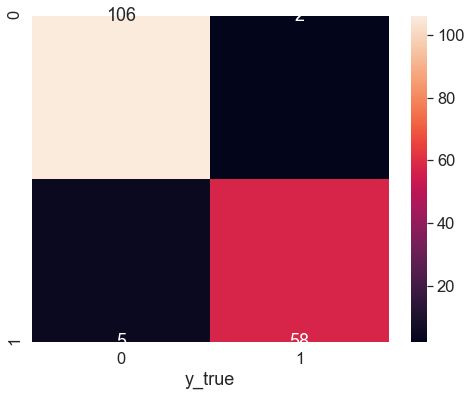

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,linecolor="red",fmt=".0f",ax=ax);
plt.xlabel("y_pred")
plt.xlabel("y_true")
plt.show()